# Population Ireland

Import libraries

In [63]:
import pandas as pd
import numpy as np
import os 
import seaborn as  sns
import math
from matplotlib import pyplot as plt

Import DataBases

In [64]:
AP=pd.read_csv("Annual Population Change 1950-2023.csv")
EE=pd.read_csv("Estimated Emigration  Citizenship 2006-2023.csv")
EM=pd.read_csv("Estimated Migration. Origin or Destination 1987-2023.csv")
EPC=pd.read_csv("Estimated Population Citizenship 2006-2023.csv")
PEA=pd.read_csv("Population Estimates Age Group 1950-2023.csv")
 #Additional databases
NIC=pd.read_csv("Non-Irish citizens usually resident and present in the State by country of citizenship 2022 EXTRA.csv")
PAE=pd.read_csv("Population Ability to speak English 2022 EXTRA.csv")

# #  Annual Population Change since 1950

Review of database

Type of files

Renaming of headers 

In [65]:
AP.head()

,STATISTIC,Year,UNIT,Annual births,Annual deaths,Natural increase,Immigrants,Emigrants,Net migration,Population change,Population
0,Annual Population Change,1951,Thousand,NaN,NaN,26.6,NaN,NaN,-35.0,-8.4,2960.6
1,Annual Population Change,1952,Thousand,NaN,NaN,27.3,NaN,NaN,-35.0,-7.7,2952.9
2,Annual Population Change,1953,Thousand,NaN,NaN,29.1,NaN,NaN,-33.0,-3.9,2949.0
3,Annual Population Change,1954,Thousand,NaN,NaN,28.2,NaN,NaN,-36.0,-7.8,2941.2
4,Annual Population Change,1955,Thousand,NaN,NaN,24.7,NaN,NaN,-45.0,-20.3,2920.9


In [66]:
AP_1=AP.copy()

In [68]:
AP=AP.rename (columns= {'Population change':'Total of the Population change','Population':'Total Population of the year'})
AP= AP.drop(['STATISTIC','UNIT'],axis= 1)

In [69]:
AP

,Year,Annual births,Annual deaths,Natural increase,Immigrants,Emigrants,Net migration,Total of the Population change,Total Population of the year
0,1951,NaN,NaN,26.6,NaN,NaN,-35.0,-8.4,2960.6
1,1952,NaN,NaN,27.3,NaN,NaN,-35.0,-7.7,2952.9
2,1953,NaN,NaN,29.1,NaN,NaN,-33.0,-3.9,2949.0
3,1954,NaN,NaN,28.2,NaN,NaN,-36.0,-7.8,2941.2
4,1955,NaN,NaN,24.7,NaN,NaN,-45.0,-20.3,2920.9
...,...,...,...,...,...,...,...,...,...
68,2019,60.5,30.9,29.6,97.1,53.1,44.0,73.6,4958.5
69,2020,59.1,32.4,26.7,95.6,50.9,44.7,71.4,5029.9
70,2021,57.3,34.3,23.0,74.1,52.3,21.8,44.8,5074.7
71,2022,59.7,33.6,26.1,107.8,56.1,51.7,77.8,5184.0


In [70]:
AP.shape

(73, 9)

In [71]:
AP.isnull().sum()

Year                               0
Annual births                     36
Annual deaths                     36
Natural increase                   0
Immigrants                        36
Emigrants                         36
Net migration                      0
Total of the Population change     0
Total Population of the year       0
dtype: int64

In [72]:
AP.notnull()

,Year,Annual births,Annual deaths,Natural increase,Immigrants,Emigrants,Net migration,Total of the Population change,Total Population of the year
0,True,False,False,True,False,False,True,True,True
1,True,False,False,True,False,False,True,True,True
2,True,False,False,True,False,False,True,True,True
3,True,False,False,True,False,False,True,True,True
4,True,False,False,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...
68,True,True,True,True,True,True,True,True,True
69,True,True,True,True,True,True,True,True,True
70,True,True,True,True,True,True,True,True,True
71,True,True,True,True,True,True,True,True,True


In [74]:
#clase=AP.dropna(axis= "columns") will delete the whole column if any information is missing in any row, on a new file
#clase=AP.dropna(axis= "columns", inplace = True)will delete the entire column if any information is missing in any row, from the original file.
#AP.dropna(axis= 0 , inplace = True)will delete only the columns that have no information in the original file.

AP.dropna(axis= 0 , inplace = True)

In [75]:
AP.dtypes


Year                                int64
Annual births                     float64
Annual deaths                     float64
Natural increase                  float64
Immigrants                        float64
Emigrants                         float64
Net migration                     float64
Total of the Population change    float64
Total Population of the year      float64
dtype: object

In [76]:
AP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 36 to 72
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            37 non-null     int64  
 1   Annual births                   37 non-null     float64
 2   Annual deaths                   37 non-null     float64
 3   Natural increase                37 non-null     float64
 4   Immigrants                      37 non-null     float64
 5   Emigrants                       37 non-null     float64
 6   Net migration                   37 non-null     float64
 7   Total of the Population change  37 non-null     float64
 8   Total Population of the year    37 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 2.9 KB


In [77]:
AP.count()

Year                              37
Annual births                     37
Annual deaths                     37
Natural increase                  37
Immigrants                        37
Emigrants                         37
Net migration                     37
Total of the Population change    37
Total Population of the year      37
dtype: int64

In [ ]:
#First graphs of births and deaths by year 

NameError: name 'plot' is not defined

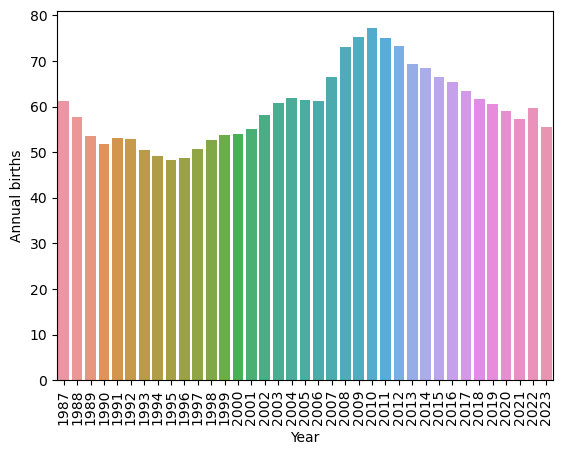

In [84]:
#Annual births
AD = sns.barplot(x='Year', y='Annual births', data=AP)
AD.set_xticklabels(AD.get_xticklabels(), rotation=90)
plot.show()

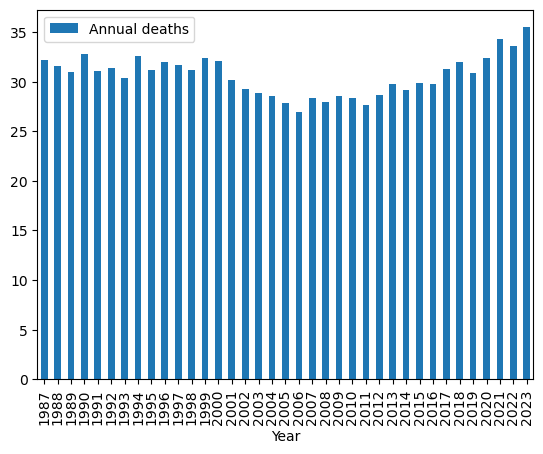

In [93]:
#Annual Deaths
values=AP[["Year","Annual births","Annual deaths","Natural increase","Immigrants","Emigrants"]]
ax= values.plot.bar(x="Year", y="Annual deaths")

In [ ]:
#Comparative births and deaths in the same years

In [94]:
#Barplot
AD=sns.barplot(AP['Annual births',AP['Annual deaths']])
plt.show()

InvalidIndexError: ('Annual births', 36    32.2
37    31.6
38    31.0
39    32.8
40    31.1
41    31.4
42    30.4
43    32.6
44    31.2
45    32.0
46    31.7
47    31.2
48    32.4
49    32.1
50    30.2
51    29.3
52    28.9
53    28.6
54    27.9
55    27.0
56    28.4
57    28.0
58    28.6
59    28.4
60    27.7
61    28.7
62    29.8
63    29.2
64    29.9
65    29.8
66    31.3
67    32.0
68    30.9
69    32.4
70    34.3
71    33.6
72    35.5
Name: Annual deaths, dtype: float64)

In [96]:
w=
plt.bar(x, Annual deaths,w, label="Annual deaths")
plt.bar(x, Annual births, w,bottom=Annual deaths, label="Annual births" )

plt.xlabel("Births and deaths")
plt.ylabel("Year")
plt.tittle("Comparative births and deaths in the same years")
plt.legend()
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4010497677.py, line 1)

In [ ]:
# First graph. Bar chart

<Axes: xlabel='Annual deaths'>

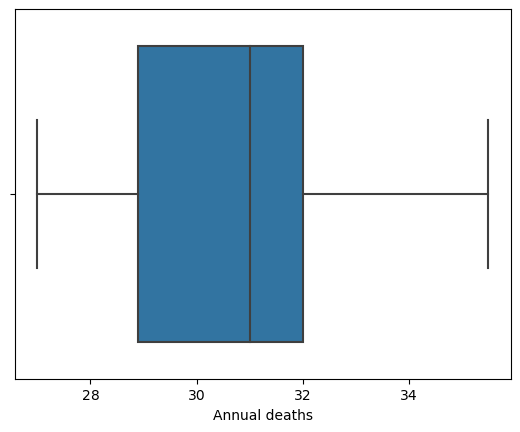

In [85]:
sns.boxplot(x=AP["Annual deaths"])

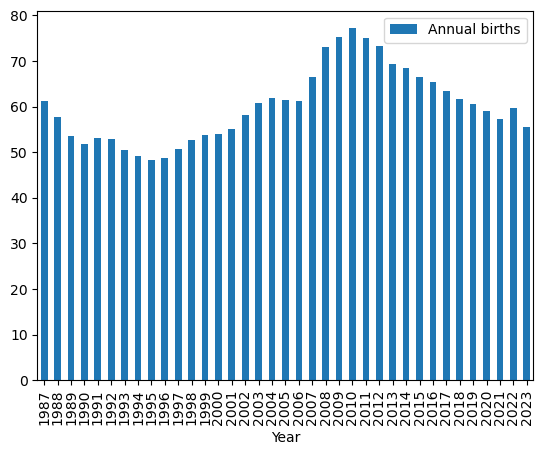

(array([1., 3., 4., 3., 3., 2., 2., 6., 4., 5., 1., 1., 1., 0., 1.]),
 array([27.        , 27.56666667, 28.13333333, 28.7       , 29.26666667,
        29.83333333, 30.4       , 30.96666667, 31.53333333, 32.1       ,
        32.66666667, 33.23333333, 33.8       , 34.36666667, 34.93333333,
        35.5       ]),
 <BarContainer object of 15 artists>)

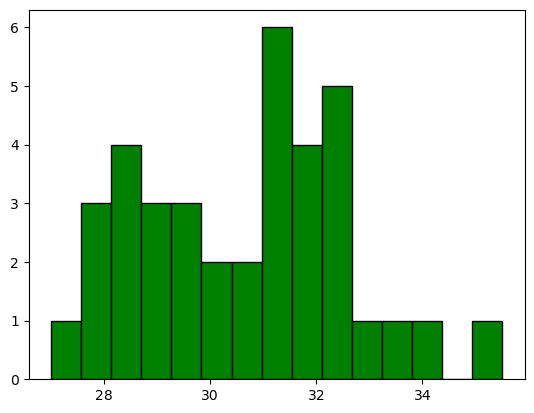

In [87]:
plt.hist(AP["Annual deaths"],15, color="green", ec="black")

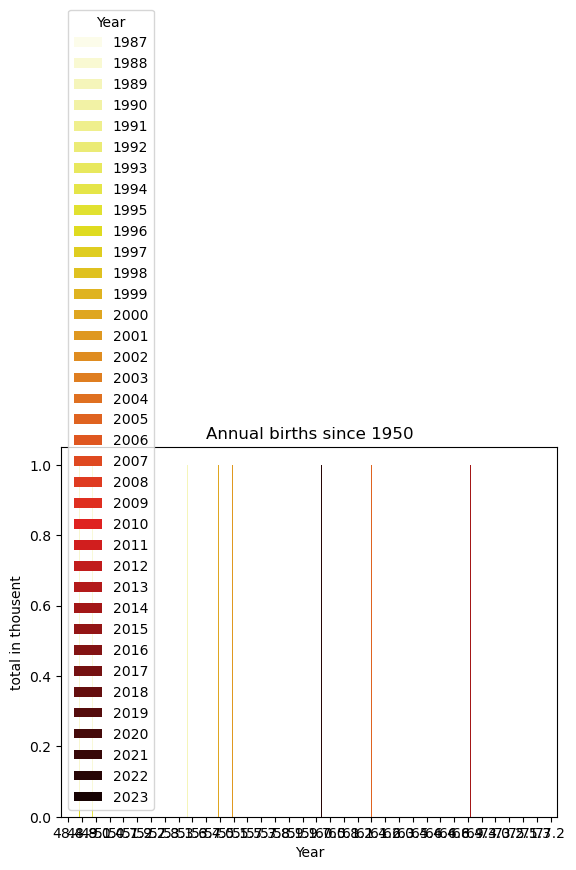

In [88]:
grafico= sns.countplot(x='Annual births', hue='Year',palette='hot_r',data= AP)
grafico.set(title='Annual births since 1950',
           xlabel='Year', ylabel='total in thousent')
plt.show()

In [89]:
AP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 36 to 72
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            37 non-null     int64  
 1   Annual births                   37 non-null     float64
 2   Annual deaths                   37 non-null     float64
 3   Natural increase                37 non-null     float64
 4   Immigrants                      37 non-null     float64
 5   Emigrants                       37 non-null     float64
 6   Net migration                   37 non-null     float64
 7   Total of the Population change  37 non-null     float64
 8   Total Population of the year    37 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 2.9 KB
